In [1]:
!pip install keras
!pip install tensorflow
!pip install --upgrade keras tensorflow
!pip install --upgrade opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json
import numpy as np
import os

In [12]:
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [13]:
from zipfile import ZipFile
data='/content/drive/MyDrive/Softronics/Classwork/Emotion.zip'

In [14]:
with ZipFile(data, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')

The data set has been extracted.


In [15]:
train_generator = train_data_gen.flow_from_directory(
	'/content/train',
	target_size=(48, 48),
	batch_size=64,
	color_mode="grayscale",
	class_mode='categorical')


Found 28709 images belonging to 7 classes.


In [16]:
validation_generator = validation_data_gen.flow_from_directory(
		'/content/test',
		target_size=(48, 48),
		batch_size=64,
		color_mode="grayscale",
		class_mode='categorical')


Found 7178 images belonging to 7 classes.


In [17]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
						input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

emotion_model.summary()

cv2.ocl.setUseOpenCL(False)

initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,
							decay_rate=0.96)

optimizer = Adam(learning_rate=lr_schedule)

emotion_model.compile(loss='categorical_crossentropy', optimizer=optimizer,
					metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                   

In [18]:
emotion_model_info = emotion_model.fit_generator(
		train_generator,
		steps_per_epoch=28709 // 64,
		epochs=30,
		validation_data=validation_generator,
		validation_steps=7178 // 64)

Epoch 1/30


<ipython-input-18-87e5f75970e7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


448/448 [==============================] - 25s 40ms/step - loss: 1.7967 - accuracy: 0.2609 - val_loss: 1.7044 - val_accuracy: 0.3447
Epoch 2/30
448/448 [==============================] - 14s 31ms/step - loss: 1.6285 - accuracy: 0.3687 - val_loss: 1.5501 - val_accuracy: 0.4124
Epoch 3/30
448/448 [==============================] - 14s 31ms/step - loss: 1.5289 - accuracy: 0.4119 - val_loss: 1.4592 - val_accuracy: 0.4399
Epoch 4/30
448/448 [==============================] - 14s 31ms/step - loss: 1.4645 - accuracy: 0.4383 - val_loss: 1.3959 - val_accuracy: 0.4667
Epoch 5/30
448/448 [==============================] - 14s 31ms/step - loss: 1.4047 - accuracy: 0.4608 - val_loss: 1.3477 - val_accuracy: 0.4888
Epoch 6/30
448/448 [==============================] - 14s 31ms/step - loss: 1.3521 - accuracy: 0.4874 - val_loss: 1.3314 - val_accuracy: 0.4951
Epoch 7/30
448/448 [==============================] - 16s 36ms/step - loss: 1.3074 - accuracy: 0.5049 - val_loss: 1.2709 - val_accuracy: 0.5193
Epo

In [19]:
emotion_model.evaluate(validation_generator)

113/113 [==============================] - 3s 23ms/step - loss: 1.0683 - accuracy: 0.6172


[1.0683375597000122, 0.6171635389328003]

In [20]:
accuracy = emotion_model_info.history['accuracy']
val_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']

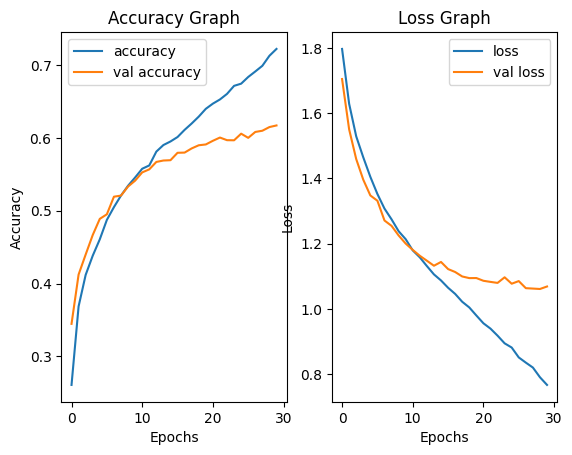

In [21]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='accuracy')
plt.plot(val_accuracy, label='val accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [22]:
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
	json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

In [23]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful",
				3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [24]:
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the camera
    ret, frame = cap.read()

    # Check if the frame is empty
    if not ret or frame is None:
        print("Error: Failed to capture frame")
        break

    # Resize the frame
    frame = cv2.resize(frame, (1280, 720))

    # Create a face detector
    face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Softronics/Classwork/haarcascades/haarcascade_frontalcatface.xml')

    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces available on the camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # Process each face available on the camera
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # Predict the emotions (assuming emotion_model and emotion_dict are defined somewhere)
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)

    # Check for user input to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()
